In [1]:
import sys
sys.path.append('../scripts/')
from robot import *                

In [2]:
class Particle:
    def __init__(self,init_pose):
        self.pose = init_pose

In [3]:
# 現在地と粒子の数
class Mcl:
    def __init__(self,init_pose,num):
        self.particles = [Particle(init_pose) for i in range(num)]

In [8]:
class EstimationAgent(Agent):
    def __init__(self,nu,omega,estimator):
        super().__init__(nu,omega)
        self.estimator = estimator
        
    def draw(self,ax,elems):
        elems.append(ax.text(0,0,"hoge",fontsize = 10))

<IPython.core.display.Javascript object>


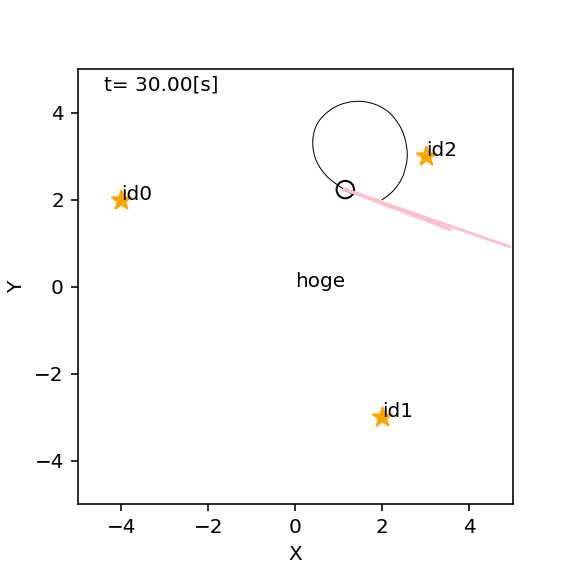

In [9]:
world = World(30,0.1)

m = Map()
for ln in [(-4,2),(2,-3),(3,3)]: m.append_landmark(Landmark(*ln))
world.append(m)

initial_pose = np.array([2,2,math.pi / 6]).T
estimator = Mcl(initial_pose,100)
circling = EstimationAgent(0.2,10.0 / 180 * math.pi,estimator)
r = Robot(initial_pose,sensor = Camera(m),agent = circling)
world.append(r)

world.draw()